In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
test_dr= r'D:\DSA Java\Deep_learning_internshala\Final_Assignment_Face Mask Dataset\Test'
validation_dr=r'D:\DSA Java\Deep_learning_internshala\Final_Assignment_Face Mask Dataset\Validation'
train_dr=r'D:\DSA Java\Deep_learning_internshala\Final_Assignment_Face Mask Dataset\Train'

In [3]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
             train_dr,
             target_size=(128,128),
             batch_size=20,
             class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
             validation_dr,
             target_size=(128,128),
             batch_size=20,
             class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
 from tensorflow.keras import layers
 from tensorflow.keras import models   

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [13]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=28)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 139s 1s/step - loss: 0.3518 - acc: 0.8445 - val_loss: 0.1668 - val_acc: 0.9464
Epoch 2/5
100/100 [==============================] - 117s 1s/step - loss: 0.1773 - acc: 0.9355 - val_loss: 0.1364 - val_acc: 0.9536
Epoch 3/5
100/100 [==============================] - 117s 1s/step - loss: 0.1166 - acc: 0.9530 - val_loss: 0.0691 - val_acc: 0.9821
Epoch 4/5
100/100 [==============================] - 116s 1s/step - loss: 0.0904 - acc: 0.9695 - val_loss: 0.0662 - val_acc: 0.9750
Epoch 5/5
100/100 [==============================] - 119s 1s/step - loss: 0.0715 - acc: 0.9745 - val_loss: 0.0406 - val_acc: 0.9839


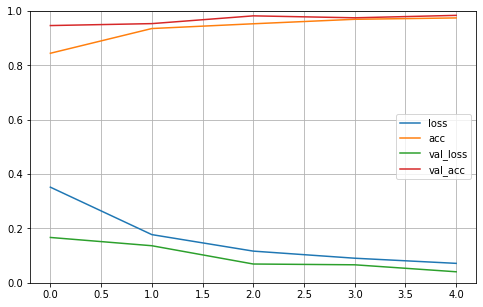

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [17]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Epoch 1/5
100/100 [==============================] - 1105s 11s/step - loss: 0.0802 - acc: 0.9670 - val_loss: 0.0126 - val_acc: 0.9980
Epoch 2/5
100/100 [==============================] - 1034s 10s/step - loss: 0.0228 - acc: 0.9910 - val_loss: 0.0398 - val_acc: 0.9870
Epoch 3/5
 99/100 [============================>.] - ETA: 10s - loss: 0.0168 - acc: 0.9970

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

In [ ]:
model.evaluate_generator(test_generator, steps=50)   